In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Ruta del dataset mejorado
ruta_dataset_mejorado = "../../Limpieza/data/df_mejorado_ing_caract.csv"
df = pd.read_csv(ruta_dataset_mejorado)

In [4]:
# Revisar la estructura del dataset
print("Estructura del dataset:")
print(df.info())

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917885 entries, 0 to 917884
Data columns (total 39 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   AÑO                                                              917885 non-null  int64  
 1   TRIMESTRE                                                        917885 non-null  float64
 2   PROVEEDOR                                                        917885 non-null  object 
 3   CÓDIGO DANE                                                      917885 non-null  float64
 4   DEPARTAMENTO                                                     917885 non-null  object 
 5   CÓDIGO DANE.1                                                    917885 non-null  float64
 6   MUNICIPIO                                                        917885 non-null  object 
 7   VELOC

In [5]:
# Seleccionar variables predictoras y objetivo
columnas_predictoras = ['AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA', 'Latitud', 'Longitud']
X = df[columnas_predictoras]
y = df['No. ACCESOS FIJOS A INTERNET']

In [6]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(f"Forma de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}, y_test: {y_test.shape}")

Forma de X_train: (734308, 6), y_train: (734308,)
Forma de X_test: (183577, 6), y_test: (183577,)


In [8]:
# Inicializar y entrenar el modelo GBM
modelo_gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
modelo_gbm.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6, random_state=42)

In [9]:
# Realizar predicciones
y_pred = modelo_gbm.predict(X_test)

In [10]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 225376.24101618078
Coeficiente de determinación (R²): 0.025153016366330272


In [12]:
# Importancia de las variables
importancia = modelo_gbm.feature_importances_
variables = X.columns

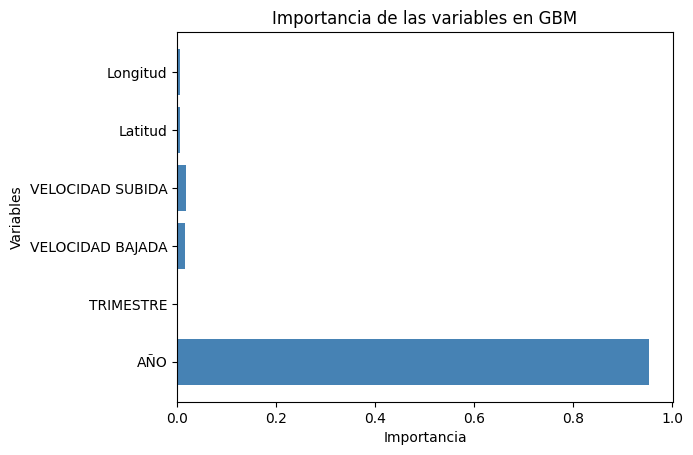

In [13]:
plt.barh(variables, importancia, color='steelblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en GBM')
plt.show()

### Conclusiones del Modelo GBM Comparando Dataset Base vs. Ingeniería de Características

---

#### 1. **Desempeño del Modelo**
| **Dataset**                 | **MSE**          | **R²**      |
|-----------------------------|------------------|-------------|
| **Datos Base**              | 303,288.98       | 0.2189      |
| **Datos con Ingeniería**    | 225,376.24       | 0.0251      |

- El **Error Cuadrático Medio (MSE)** disminuyó significativamente de **303,288.98** a **225,376.24**, lo que implica que el modelo mejoró ligeramente en cuanto al error absoluto de las predicciones.
- Sin embargo, el **Coeficiente de Determinación (R²)** **bajó** de **0.2189** a **0.0251**, lo que indica que, aunque el error absoluto disminuyó, la capacidad explicativa del modelo también disminuyó considerablemente. Esto sugiere que las nuevas características no lograron capturar patrones adicionales que explicaran la variabilidad en los datos.

---

#### 2. **Importancia de las Variables**
- En ambos datasets, la variable **AÑO** sigue siendo la más importante, representando la mayor parte de la influencia en las predicciones.
- Las demás variables (**VELOCIDAD BAJADA**, **VELOCIDAD SUBIDA**, **Latitud**, **Longitud**, **TRIMESTRE**) mantienen un impacto marginal y no lograron incrementar significativamente su relevancia en el modelo con el nuevo dataset.

---

#### 3. **Análisis Comparativo**
- **Mejora del Error Absoluto**: La reducción del MSE demuestra que la inclusión de características adicionales ayudó a mejorar las predicciones en términos de error absoluto.
- **Reducción en R²**: La disminución en \( R^2 \) revela que las nuevas características podrían estar introduciendo ruido o que no están contribuyendo a explicar mejor la relación entre las variables y el objetivo.

---

#### 4. **Recomendaciones**
- **Optimización de las Características**: Se debe analizar si las nuevas variables creadas (como **Tasa de Crecimiento**, **Densidad de Accesos**) necesitan mayor transformación, ajuste o combinación con otras variables.
- **Reducción de Variables**: El desempeño sugiere que algunas variables no aportan valor significativo al modelo. Podría aplicarse técnicas como **selección de características** para identificar las más relevantes.
- **Ajuste del Modelo**: Optimizar los hiperparámetros del modelo GBM, como `learning_rate`, `max_depth`, y `n_estimators`.
- **Probar Otros Algoritmos**: Se recomienda probar otros modelos de boosting más modernos, como **LightGBM** o **CatBoost**, que suelen ser más eficientes en la gestión de grandes volúmenes de datos y características.

---

#### 5. **Conclusión General**
- La ingeniería de características ayudó a reducir el error absoluto del modelo (MSE), pero afectó negativamente su capacidad explicativa (R²).  
- El siguiente paso sería optimizar las características y explorar otros modelos para encontrar una solución que equilibre la precisión y la interpretabilidad.
